# Growth rate
- After t time unit, a quantity x growing at rate g will be: x * (1 + g) ** t
- Given two measurement in t time, the the growth rate is: (after/before) ** (1/t) - 1

In [1]:
# given the number of cases one month apart
sept_7 = 4366
aug_7 = 1830
# calculate the month growth rate
growth_per_month = (sept_7 / aug_7) - 1
growth_per_month

1.385792349726776

In [2]:
# estimate the number of cases next months, if growth rate won't change
sept_7 * (1 + growth_per_month)

10416.369398907103

In [3]:
# what if it goes on this way for a year
sept_7 * (1 + growth_per_month) ** 12

148482554.67988718

In [4]:
# US federal budget increase in ten years
fed_budget_2002 = 2370000000000
fed_budget_2012 = 3380000000000
fed_budget_2012 - fed_budget_2002

1010000000000

In [5]:
# US federal budget year growth in that period is about 3.6%
g = (fed_budget_2012 / fed_budget_2002) ** (1/10) - 1
g

0.03613617208346853

In [6]:
# estimate what if it kept like that - Actual 2018 budget: $4.1 trillion, a bit less
fed_budget_2002 * (1 + g) ** 16

4182324373087.768

# Array

In [7]:
from datascience import *

In [8]:
a = make_array(1, 2, 3)
a

array([1, 2, 3])

In [9]:
a + 5, a

(array([6, 7, 8]), array([1, 2, 3]))

In [10]:
sum(a), max(a), min(a)

(6, 3, 1)

In [11]:
# put esitmation for the next three years in an array
fed_budget_2002 * (1 + g) ** a

array([2.45564273e+12, 2.54438026e+12, 2.63632442e+12])

# Columns

In [12]:
movies = Table.read_table('../data/top_movies_2017.csv')
movies.set_format((2, 3), NumberFormatter)
movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
Star Wars,Fox,"460,998,007","1,583,483,200",1977
The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
Titanic,Paramount,"658,672,302","1,204,368,000",1997
The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
Jaws,Universal,"260,000,000","1,138,620,700",1975
Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [13]:
# grab the gross column, as an array
movies.column(3)

array([1796176700, 1583483200, 1266072700, 1261085000, 1204368000,
       1164590000, 1138620700, 1103564200,  983226600,  969010000,
        961143200,  888264400,  872825900,  871220000,  865082100,
        836188200,  817186200,  802874300,  792511700,  792480000,
        787003100,  760778000,  738256500,  702747400,  701621600,
        698884100,  695036400,  684256200,  683474000,  664972000,
        661980500,  655014400,  646090100,  632734400,  631642700,
        627259300,  622283500,  617719400,  615800300,  602157000,
        599215600,  597261000,  596963700,  589407000,  587729300,
        584200000,  581890900,  574546200,  574430800,  566403700,
        562200300,  559666600,  557803900,  547976900,  547504100,
        545629600,  537326000,  536079700,  534811300,  533400000,
        533400000,  532424500,  530776000,  527395500,  524960300,
        513177800,  511902300,  511878400,  509913700,  505876000,
        505244700,  504014165,  499245400,  497575800,  497066

In [14]:
adjustment = movies.column('Gross (Adjusted)') / movies.column('Gross')
adjustment

array([ 9.04071227,  3.43490249,  7.97921336,  2.89830938,  1.82847828,
       17.78      ,  4.37931038,  9.87777778,  4.22155714,  5.24000245,
        1.0261364 ,  6.13103475,  3.0048221 , 11.77324324,  1.13750615,
        2.70343195,  2.03050893,  1.69188348,  1.8745083 ,  5.08      ,
        3.17135393,  7.24928095,  9.6620192 ,  1.07738625,  5.19849046,
        2.11621342,  6.79591148,  3.62508913,  1.09643912, 10.45624844,
        1.23767421,  4.61786323, 12.52112597,  2.61231145,  1.43156194,
        6.13103423,  5.84868382,  1.5301205 ,  2.0113067 ,  2.10720318,
        7.11199958, 10.33720958,  2.54286286, 11.53865987,  5.8486841 ,
        5.08      , 16.16363611,  1.35725192, 13.67692381,  5.53955489,
        4.7006132 ,  2.22807037, 26.14705822,  1.45026555,  1.43761005,
        4.70370345,  1.00967474,  5.75556245,  1.43156208, 14.81666667,
        7.40833333,  3.76006003,  1.43150064,  1.38689536,  2.49257344,
        1.49810467,  1.1422844 ,  1.74401168,  3.79914491,  2.85

In [15]:
movies.with_column("Adjustment", adjustment)

Title,Studio,Gross,Gross (Adjusted),Year,Adjustment
Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939,9.04071
Star Wars,Fox,"460,998,007","1,583,483,200",1977,3.4349
The Sound of Music,Fox,"158,671,368","1,266,072,700",1965,7.97921
E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982,2.89831
Titanic,Paramount,"658,672,302","1,204,368,000",1997,1.82848
The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956,17.78
Jaws,Universal,"260,000,000","1,138,620,700",1975,4.37931
Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965,9.87778
The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973,4.22156
Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937,5.24


In [16]:
%matplotlib inline

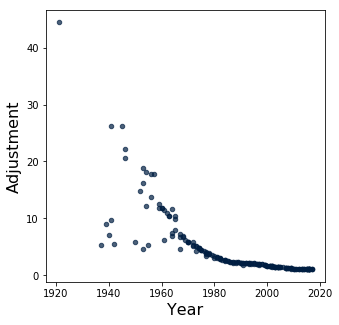

In [17]:
movies.with_column('Adjustment', adjustment).scatter('Year', 'Adjustment')

In [18]:
# why there are dots outside the baseline?
movies.with_column("Adjustment", adjustment).sort('Year').show(20)
# re-released!

Title,Studio,Gross,Gross (Adjusted),Year,Adjustment
The Four Horsemen of the Apocalypse,Metro,"9,183,673","408,214,300",1921,44.45
Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937,5.24
Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939,9.04071
Pinocchio,Disney,"84,254,167","599,215,600",1940,7.112
Fantasia,Disney,"76,408,097","738,256,500",1941,9.66202
Sergeant York,Warner Brothers,"16,361,885","427,815,200",1941,26.1471
Bambi,RKO,"102,247,150","566,403,700",1942,5.53955
The Bells of St. Mary's,RKO,"21,333,333","557,803,900",1945,26.1471
The Best Years of Our Lives,RKO,"23,650,000","488,950,000",1946,20.6744
Duel in the Sun,Selz.,"20,408,163","453,571,400",1946,22.225
